In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

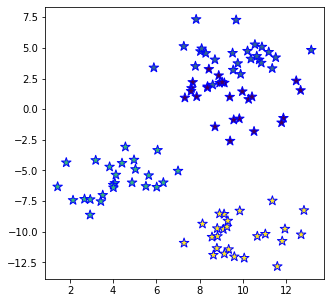

In [ ]:
plt.figure(figsize = (5, 5))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*', s=100, edgecolors='blue')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
y_train

array([3, 3, 0, 3, 1, 2, 0, 0, 2, 0, 0, 0, 3, 1, 2, 0, 3, 3, 0, 0, 1, 1,
       2, 1, 0, 3, 2, 2, 3, 1, 2, 2, 0, 2, 3, 2, 3, 2, 1, 1, 3, 2, 3, 1,
       3, 0, 3, 0, 3, 3, 2, 2, 3, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 3, 0, 0, 0, 3, 3, 1, 3])

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1) 

In [ ]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 92.0
Accuracy with k=1 92.0


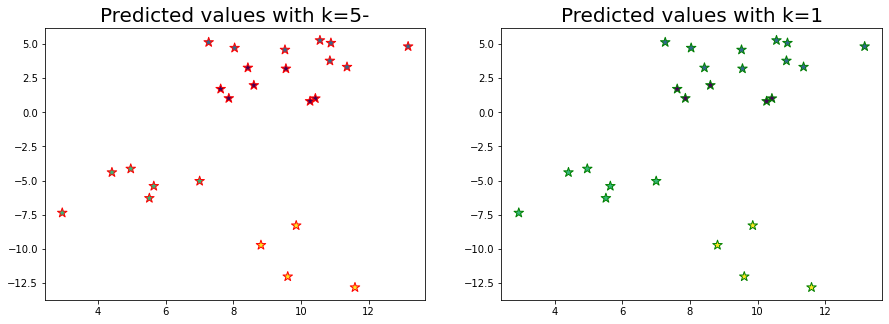

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='red')
plt.title("Predicted values with k=5-", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='green')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

In [ ]:
# KNN - LAB

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal length", "sepal width", "petal length","petal width","class"]
dataset = pd.read_csv(url, names=col_names)

In [ ]:
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.shape

(150, 5)

In [ ]:
training = dataset.values[:,0:4]
training

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
trainingclass = dataset.values[:,-1]
trainingclass

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
def eucliden_distance(A,B):
  distance = 0
  for i in range(len(A)):
    distance += (A[i] - B[i]) **2
  distance = math.sqrt(distance)
  return distance

In [ ]:
unique_class = list(set(trainingclass))

In [ ]:
unique_class

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

In [ ]:
#converting the labels to numerical labels
for i in range(len(trainingclass)):
  for k in range(len(unique_class)):
    if(trainingclass[i] == unique_class[k]):
      trainingclass[i] = k
print(trainingclass) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
testing = training[78]
testing

array([6.0, 2.9, 4.5, 1.5], dtype=object)

In [ ]:
distance = []
for i in range(len(training)):
  distance.append([eucliden_distance(training[i], testing), trainingclass[i]])

In [ ]:
distance

[[3.531288716601915, 0],
 [3.5383612025908264, 0],
 [3.702701716314724, 0],
 [3.5623026261113755, 0],
 [3.5763109484495335, 0],
 [3.2264531609803355, 0],
 [3.641428291206625, 0],
 [3.455430508634199, 0],
 [3.722902093797257, 0],
 [3.4942810419312296, 0],
 [3.4190641994557516, 0],
 [3.4336569426778794, 0],
 [3.6083237105337433, 0],
 [4.052159917870962, 0],
 [3.71887079635741, 0],
 [3.5425979167836705, 0],
 [3.5791060336346563, 0],
 [3.4957116585897072, 0],
 [3.190611226708763, 0],
 [3.472751070837068, 0],
 [3.1843366656181313, 0],
 [3.414674215792775, 0],
 [4.0484564959994325, 0],
 [3.1320919526731648, 0],
 [3.184336665618132, 0],
 [3.3331666624997918, 0],
 [3.2969683043669074, 0],
 [3.4190641994557516, 0],
 [3.491418050019218, 0],
 [3.4467375879228173, 0],
 [3.402939905434711, 0],
 [3.2893768406797053, 0],
 [3.6110940170535573, 0],
 [3.638681079732051, 0],
 [3.4942810419312296, 0],
 [3.6972963094672298, 0],
 [3.5411862419251547, 0],
 [3.4942810419312296, 0],
 [3.8078865529319543, 0],
 

In [ ]:
distance.sort()
distance

[[0.0, 2],
 [0.19999999999999973, 2],
 [0.24494897427831785, 2],
 [0.33166247903553975, 2],
 [0.3464101615137756, 2],
 [0.374165738677394, 2],
 [0.38729833462074176, 2],
 [0.4123105625617664, 2],
 [0.4358898943540673, 1],
 [0.4690415759823427, 2],
 [0.47958315233127197, 1],
 [0.48989794855663593, 2],
 [0.5000000000000004, 2],
 [0.5099019513592785, 2],
 [0.5196152422706631, 2],
 [0.5196152422706635, 1],
 [0.5291502622129179, 2],
 [0.5291502622129182, 2],
 [0.5477225575051661, 2],
 [0.5477225575051663, 2],
 [0.5567764362830021, 2],
 [0.574456264653803, 2],
 [0.6082762530298217, 2],
 [0.6082762530298225, 2],
 [0.6164414002968976, 1],
 [0.6244997998398395, 2],
 [0.6403124237432845, 2],
 [0.6403124237432845, 2],
 [0.640312423743285, 2],
 [0.6633249580710799, 2],
 [0.6782329983125265, 1],
 [0.6855654600401041, 1],
 [0.6855654600401044, 2],
 [0.7000000000000002, 2],
 [0.7071067811865475, 2],
 [0.7280109889280516, 2],
 [0.7280109889280518, 2],
 [0.7416198487095664, 2],
 [0.7549834435270752, 2]

In [ ]:
k = 5

In [ ]:
identify = [0 for i in range(len(unique_class))]

In [ ]:
identify

[0, 0, 0]

In [ ]:
for i in range(1, k+1):
  identify[distance[i][1]] += 1
print(identify)

[0, 0, 5]


In [ ]:
print("The Predicated Class is ", unique_class[identify.index(max(identify))])  

The Predicated Class is  Iris-versicolor
